In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/project-2-master (1)/datasets/train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [ ]:
#Quick view of summary statistics to look for outliers or areas of concern with the data set
# the salesprice max is of interest. Since the data set includes agricultural and commercial property, may want to inspect those to see if they need to be removed. 
# PID column doesn't provide anything significant or would be a feature in the model so this column could be dropped. Some of the homes are old and there could be duplicate homes 
# indicated by the Parcel I.D. Need to check for duplicates
#Lot Area, Lot Frontage max should be inspected for outliers. 
#Take a look into misc Vvales
df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [ ]:
#PID Check for duplicates



# check for duplicate PIDs
dup_PID = df.duplicated(subset=['PID'], keep=False)

# filter the DataFrame using the mask to show duplicates
duplicates_df = df[dup_PID]

# num of duplicate PID
num_dup = dup_PID.sum()
# display the duplicate rows
print(dup_PID.sum())


0


In [ ]:
# Drop PID column - not needed for analysis


df = df.drop('PID', axis=1)

# Check to confirm dropped
print(df)


### Deal with missing values

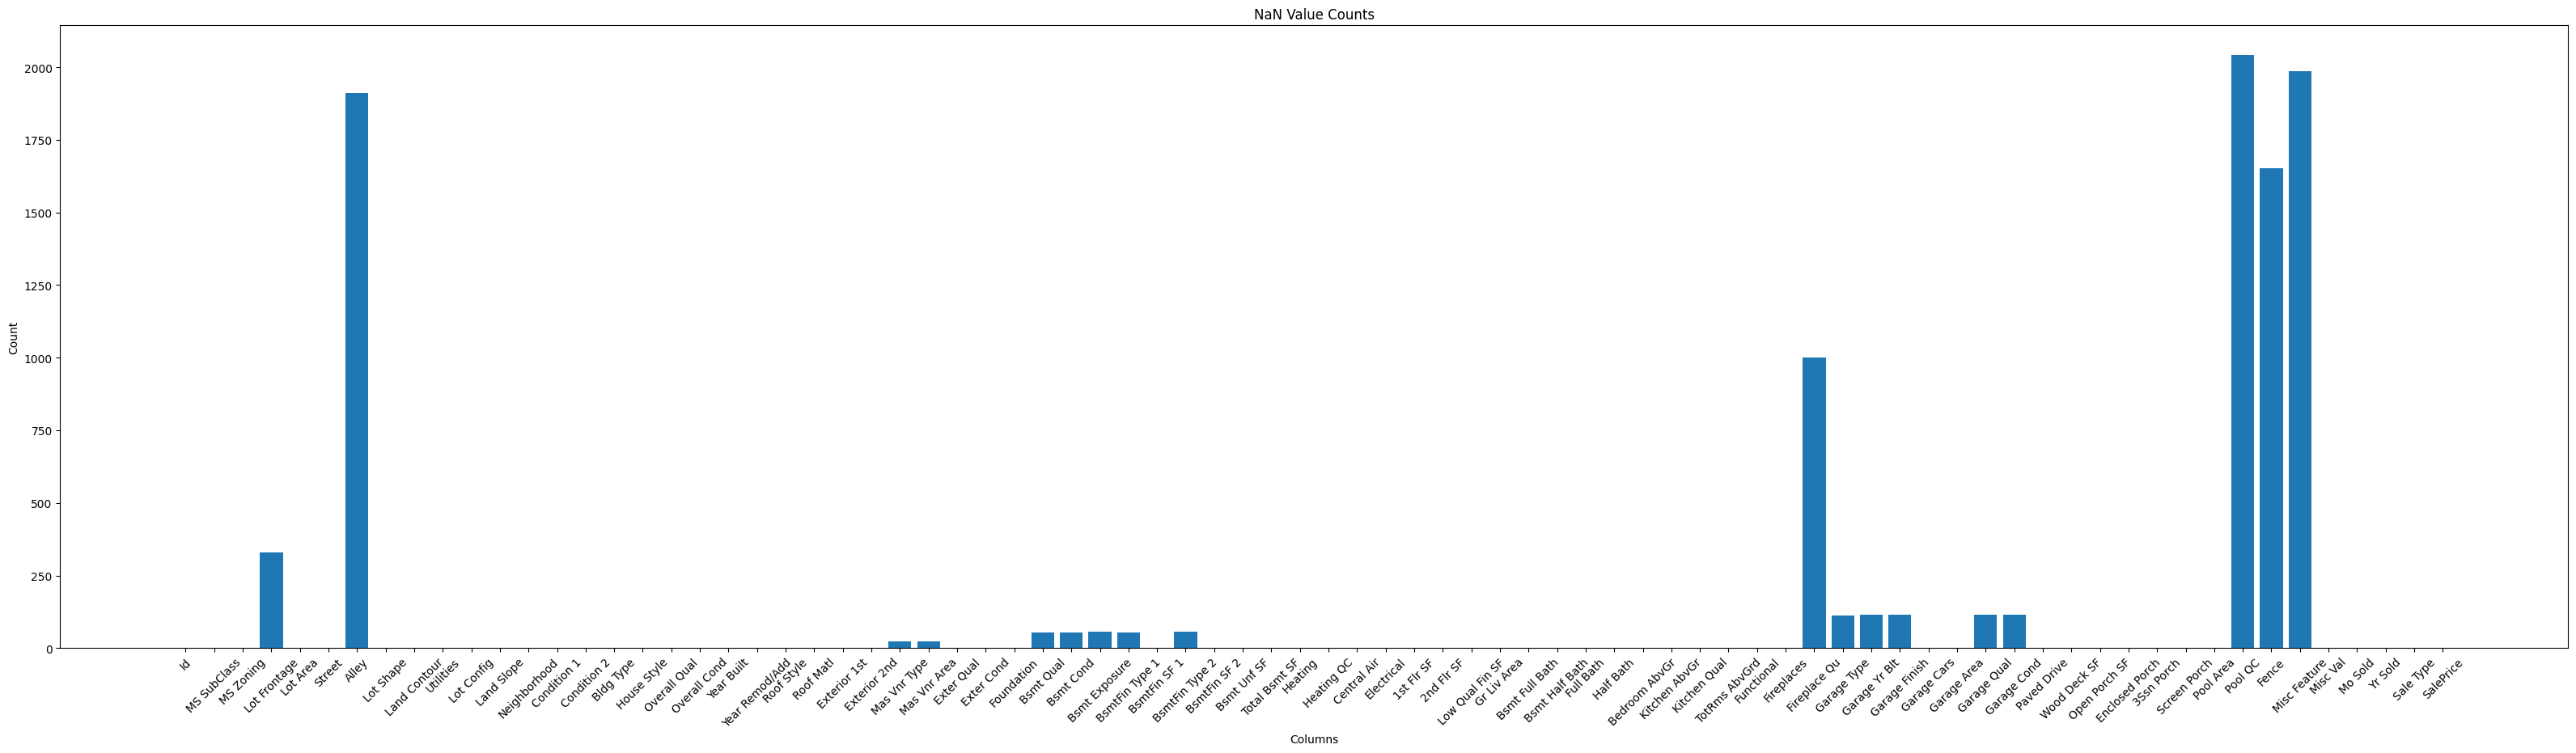

In [ ]:


import matplotlib.pyplot as plt



# Count the number of NaN values in each column
nan_counts = df.isna().sum()

# Set the figure size
plt.figure(figsize=(40, 10))

# Create a bar chart of the NaN value counts
plt.bar(nan_counts.index, nan_counts.values)

# Set chart title and axis labels
plt.title('NaN Value Counts')
plt.xlabel('Columns')
plt.ylabel('Count')

# Set the x-axis labels to be slanted at a 45 degree angle
plt.xticks(rotation=45)

# Display the chart
plt.show()



In [ ]:


# calculate the fraction of missing or NaN values for each row
missing_fraction = df.isna().sum(axis=1) / df.shape[1]

# select the rows where the fraction of missing or NaN values is greater than 0.9
missing_rows = df[missing_fraction > 0.10]

# print the selected rows
print(missing_rows)


## It appears that location of property matters. The properties zoned FV for floating village are the most expensive. These properties are located near main made lakes. There are only a small number of these properties. Most properties are zoned RL 

Top 11 Priciest Neighborhoods:

* StoneBr            329675
* NridgHt            322831
* NoRidge    316294
* GrnHill    280000
* Veenker    253570
* Timber     241051
* Somerst    227183
* ClearCr    217490
* Crawfor    205901
* CollgCr    202497
* Blmngtn    200417

In [ ]:


# View the unique values in the "MS Zoning" column
unique_zoning = df['MS Zoning'].unique()
print(unique_zoning)


['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']


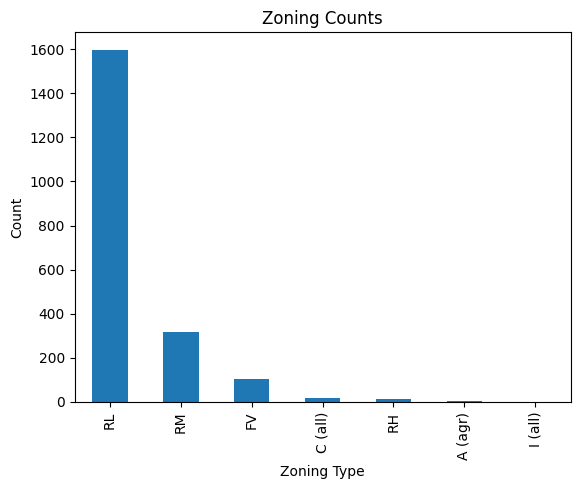

In [ ]:
# Calculate the sum of each unique value in the "MS Zoning" column
zoning_counts = df['MS Zoning'].value_counts()

# Create a bar chart of the zoning counts
zoning_counts.plot(kind='bar')
plt.title('Zoning Counts')
plt.xlabel('Zoning Type')
plt.ylabel('Count')
plt.show()


In [ ]:
# calculate the mean price of FV
mean_price = df.loc[df['MS Zoning'] == 'FV', 'SalePrice'].mean()

# display the mean price
print(mean_price)

218618.31683168316


In [ ]:
# calculate the mean price of RL
mean_price = df.loc[df['MS Zoning'] == 'RL', 'SalePrice'].mean()

# display the mean price
print(mean_price)

191235.16458072592


In [ ]:


# calculate the mean price of Agriculture
mean_price = df.loc[df['MS Zoning'] == 'A (agr)', 'SalePrice'].mean()

# display the mean price
print(mean_price)


47300.0


In [ ]:
# calculate the mean price of RH
mean_price = df.loc[df['MS Zoning'] == 'RH', 'SalePrice'].mean()

# display the mean price
print(mean_price)

148859.57142857142


In [ ]:
# calculate the mean price of I
mean_price = df.loc[df['MS Zoning'] == 'I (all)', 'SalePrice'].mean()

# display the mean price
print(mean_price)

57625.0


In [ ]:
# calculate the mean price of C
mean_price = df.loc[df['MS Zoning'] == 'C (all)', 'SalePrice'].mean()

# display the mean price
print(mean_price)

78010.8947368421


In [ ]:
# calculate the mean price of RM
mean_price = df.loc[df['MS Zoning'] == 'RM', 'SalePrice'].mean()

# display the mean price
print(mean_price)

129119.14240506329


In [ ]:
# FV properties mainly in one neighborhood

# sum the number of properties with "FV" in the "MS Zoning" column
fv_properties_by_neighborhood = df[df['MS Zoning'] == 'FV'].groupby('Neighborhood')['MS Zoning'].count()

# display the neighborhoods with the sum of properties with "FV" in the "MS Zoning" column
print(fv_properties_by_neighborhood)


Neighborhood
Somerst    101
Name: MS Zoning, dtype: int64


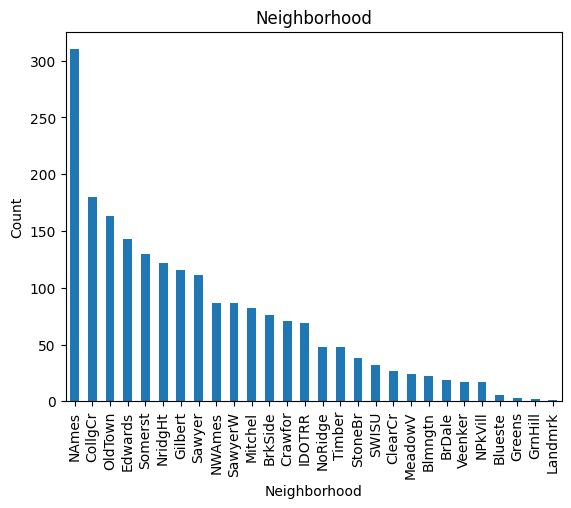

In [ ]:
#Bar chart of year sold

# Calculate the sum of each unique value in the "MS Zoning" column
zoning_counts = df['Neighborhood'].value_counts()

# Create a bar chart of the zoning counts
zoning_counts.plot(kind='bar')
plt.title('Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.show()

In [ ]:

# Neighborhoods grouped by average sales price
avg_sale_price_by_neighborhood = df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)

# display the neighborhoods in descending order
print(avg_sale_price_by_neighborhood)



Neighborhood
StoneBr    329675.736842
NridgHt    322831.352459
NoRidge    316294.125000
GrnHill    280000.000000
Veenker    253570.588235
Timber     241051.354167
Somerst    227183.900000
ClearCr    217490.074074
Crawfor    205901.211268
CollgCr    202497.216667
Blmngtn    200417.681818
NWAmes     194619.022989
Gilbert    189228.387931
Greens     188666.666667
SawyerW    187760.160920
Mitchel    167656.707317
NAmes      145905.816129
Blueste    144566.666667
NPkVill    140476.470588
Sawyer     137181.909910
Landmrk    137000.000000
SWISU      134758.875000
Edwards    130493.468531
BrkSide    127022.697368
OldTown    125276.300613
BrDale     103371.052632
IDOTRR     101103.188406
MeadowV    100231.250000
Name: SalePrice, dtype: float64


In [ ]:
# Mean Salesprice by Type of Dwelling 



mean_sale_price_by_dwelling_type = df.groupby('MS SubClass')['SalePrice'].mean().sort_values(ascending=False)

# display the mean sale price for each type of dwelling
print(mean_sale_price_by_dwelling_type)


MS SubClass
60     239225.769036
120    211813.613636
75     204875.000000
20     189305.488312
80     169569.825581
85     154398.214286
70     153354.455556
150    148400.000000
90     139296.333333
160    138452.215909
50     137270.000000
190    124310.326087
40     119125.000000
45     116372.727273
180    109672.727273
30      94936.346535
Name: SalePrice, dtype: float64


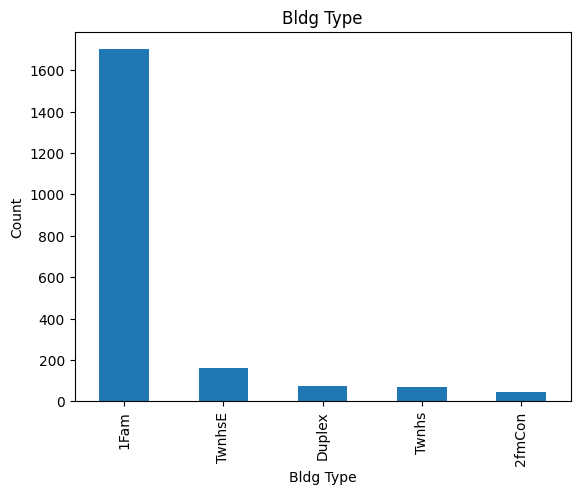

In [ ]:
#Bar chart of year sold

# Calculate the sum of each unique value in the "MS Zoning" column
zoning_counts = df['Bldg Type'].value_counts()

# Create a bar chart of the zoning counts
zoning_counts.plot(kind='bar')
plt.title('Bldg Type')
plt.xlabel('Bldg Type')
plt.ylabel('Count')
plt.show()

In [ ]:


# group by "Neighborhood" and "Bldg Type" and calculate the mean sale price for each group
mean_salesprice_by_neighborhood_and_buildingtype = df.groupby(['Neighborhood', 'Bldg Type'])['SalePrice'].mean().sort_values(ascending=False)


# display the mean sales price for each neighborhood and building type
mean_salesprice_by_neighborhood_and_buildingtype.head(40)


Neighborhood  Bldg Type
StoneBr       1Fam         425513.900000
NridgHt       1Fam         353456.266667
NoRidge       1Fam         316294.125000
Crawfor       TwnhsE       298280.571429
GrnHill       TwnhsE       280000.000000
Veenker       TwnhsE       267340.000000
NridgHt       TwnhsE       250794.440000
Veenker       1Fam         247833.333333
Somerst       1Fam         247695.435294
Timber        TwnhsE       241500.000000
              1Fam         241041.808511
StoneBr       TwnhsE       223188.888889
ClearCr       1Fam         220147.384615
CollgCr       1Fam         205036.912791
Blmngtn       TwnhsE       204006.421053
Crawfor       1Fam         198067.033333
NWAmes        1Fam         196588.690476
Somerst       TwnhsE       196077.968750
SawyerW       1Fam         194214.408451
Greens        TwnhsE       190000.000000
Gilbert       1Fam         189916.605263
Greens        Twnhs        188000.000000
NridgHt       Twnhs        186357.142857
CollgCr       Duplex       185000

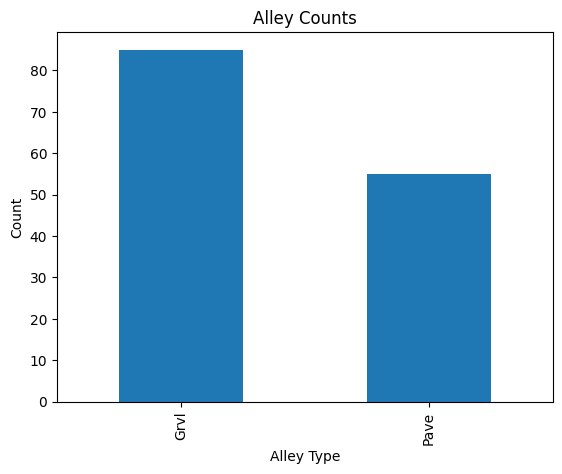

In [ ]:
# Calculate the sum of each unique value in the "Alley" column
zoning_counts = df['Alley'].value_counts()

# Create a bar chart of the zoning counts
zoning_counts.plot(kind='bar')
plt.title('Alley Counts')
plt.xlabel('Alley Type')
plt.ylabel('Count')
plt.show()


### Cleaning the Alley Data. NaN should be No Access. 

In [ ]:


# get the unique types for the "Alley" column
unique_alley_types = df['Alley'].unique()

# print the unique types
print(unique_alley_types)


[nan 'Pave' 'Grvl']


In [ ]:

# fill NaN values in the "Alley" column with "NA" which is No Access. A good feature of homes
df['Alley'].fillna('NA', inplace=True)

# print the updated DataFrame
print(df)


        Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0      109           60        RL           NaN     13517   Pave    NA   
1      544           60        RL          43.0     11492   Pave    NA   
2      153           20        RL          68.0      7922   Pave    NA   
3      318           60        RL          73.0      9802   Pave    NA   
4      255           50        RL          82.0     14235   Pave    NA   
...    ...          ...       ...           ...       ...    ...   ...   
2046  1587           20        RL          79.0     11449   Pave    NA   
2047   785           30        RL           NaN     12342   Pave    NA   
2048   916           50        RL          57.0      7558   Pave    NA   
2049   639           20        RL          80.0     10400   Pave    NA   
2050    10           60        RL          60.0      7500   Pave    NA   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
0          IR1          Lvl    All

In [ ]:


# fill NaN values in the "Mas Vnr Type" column with "NG" - None Given
df['Mas Vnr Type'].fillna('NG', inplace=True)

# print the updated DataFrame
print(df)


        Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0      109           60        RL           NaN     13517   Pave    NA   
1      544           60        RL          43.0     11492   Pave    NA   
2      153           20        RL          68.0      7922   Pave    NA   
3      318           60        RL          73.0      9802   Pave    NA   
4      255           50        RL          82.0     14235   Pave    NA   
...    ...          ...       ...           ...       ...    ...   ...   
2046  1587           20        RL          79.0     11449   Pave    NA   
2047   785           30        RL           NaN     12342   Pave    NA   
2048   916           50        RL          57.0      7558   Pave    NA   
2049   639           20        RL          80.0     10400   Pave    NA   
2050    10           60        RL          60.0      7500   Pave    NA   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
0          IR1          Lvl    All

## Masonry

In [ ]:


# replace 'no_avail' in the "Mas Vnr Area" column with 0
df['Mas Vnr Area'].replace('no_avail', 0, inplace=True)

# print the updated DataFrame
print(df)


        Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0      109           60        RL           NaN     13517   Pave    NA   
1      544           60        RL          43.0     11492   Pave    NA   
2      153           20        RL          68.0      7922   Pave    NA   
3      318           60        RL          73.0      9802   Pave    NA   
4      255           50        RL          82.0     14235   Pave    NA   
...    ...          ...       ...           ...       ...    ...   ...   
2046  1587           20        RL          79.0     11449   Pave    NA   
2047   785           30        RL           NaN     12342   Pave    NA   
2048   916           50        RL          57.0      7558   Pave    NA   
2049   639           20        RL          80.0     10400   Pave    NA   
2050    10           60        RL          60.0      7500   Pave    NA   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
0          IR1          Lvl    All

In [ ]:


# print the "Mas Vnr Area" column
print(df['Mas Vnr Area'])


0       289.0
1       132.0
2         0.0
3         0.0
4         0.0
        ...  
2046      0.0
2047      0.0
2048      0.0
2049      0.0
2050      0.0
Name: Mas Vnr Area, Length: 2051, dtype: float64


### Basement Features Missing Values. Nan is more than likely equal to none. Fill nan with None. Homes without a basement, shouldn't have a basement condition. Fill those values with 'None'

In [ ]:


# get the unique types for the "Bsmt Qual" column
unique_bsmt_qual_types = df['Bsmt Qual'].unique()

# print the unique types
print(unique_bsmt_qual_types)


['TA' 'Gd' 'Fa' nan 'Ex' 'Po']


In [ ]:

# replace NaN values in "Bsmt Qual" column with "None"
df['Bsmt Qual'].fillna('None', inplace=True)

# print the updated DataFrame
print(df)


        Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0      109           60        RL           NaN     13517   Pave    NA   
1      544           60        RL          43.0     11492   Pave    NA   
2      153           20        RL          68.0      7922   Pave    NA   
3      318           60        RL          73.0      9802   Pave    NA   
4      255           50        RL          82.0     14235   Pave    NA   
...    ...          ...       ...           ...       ...    ...   ...   
2046  1587           20        RL          79.0     11449   Pave    NA   
2047   785           30        RL           NaN     12342   Pave    NA   
2048   916           50        RL          57.0      7558   Pave    NA   
2049   639           20        RL          80.0     10400   Pave    NA   
2050    10           60        RL          60.0      7500   Pave    NA   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
0          IR1          Lvl    All

In [ ]:
# get the unique types for the "Bsmt Cond" column
unique_bsmt_cond_types = df['Bsmt Cond'].unique()

# print the unique types
print(unique_bsmt_cond_types)

['TA' 'Gd' nan 'Fa' 'Po' 'Ex']


In [ ]:

# replace NaN values in "Bsmt Cond" column with "None"
df['Bsmt Cond'].fillna('None', inplace=True)

# print the updated DataFrame
print(df)


        Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0      109           60        RL           NaN     13517   Pave    NA   
1      544           60        RL          43.0     11492   Pave    NA   
2      153           20        RL          68.0      7922   Pave    NA   
3      318           60        RL          73.0      9802   Pave    NA   
4      255           50        RL          82.0     14235   Pave    NA   
...    ...          ...       ...           ...       ...    ...   ...   
2046  1587           20        RL          79.0     11449   Pave    NA   
2047   785           30        RL           NaN     12342   Pave    NA   
2048   916           50        RL          57.0      7558   Pave    NA   
2049   639           20        RL          80.0     10400   Pave    NA   
2050    10           60        RL          60.0      7500   Pave    NA   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
0          IR1          Lvl    All

In [ ]:
# get the unique types for the "Bsmt Exposure" column
unique_bsmt_exp_types = df['Bsmt Exposure'].unique()

# print the unique types
print(unique_bsmt_exp_types)

['No' 'Gd' 'Av' nan 'Mn']


In [ ]:
# replace NaN values in "Bsmt Exposure" column with "None"
df['Bsmt Exposure'].fillna('None', inplace=True)

# print the updated DataFrame
print(df)

        Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0      109           60        RL           NaN     13517   Pave    NA   
1      544           60        RL          43.0     11492   Pave    NA   
2      153           20        RL          68.0      7922   Pave    NA   
3      318           60        RL          73.0      9802   Pave    NA   
4      255           50        RL          82.0     14235   Pave    NA   
...    ...          ...       ...           ...       ...    ...   ...   
2046  1587           20        RL          79.0     11449   Pave    NA   
2047   785           30        RL           NaN     12342   Pave    NA   
2048   916           50        RL          57.0      7558   Pave    NA   
2049   639           20        RL          80.0     10400   Pave    NA   
2050    10           60        RL          60.0      7500   Pave    NA   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
0          IR1          Lvl    All

In [ ]:
# replace NaN values in "Bsmt Exposure" column with "None"
df['BsmtFin SF 1'].fillna('None', inplace=True)

# print the updated DataFrame
print(df)

        Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0      109           60        RL           NaN     13517   Pave    NA   
1      544           60        RL          43.0     11492   Pave    NA   
2      153           20        RL          68.0      7922   Pave    NA   
3      318           60        RL          73.0      9802   Pave    NA   
4      255           50        RL          82.0     14235   Pave    NA   
...    ...          ...       ...           ...       ...    ...   ...   
2046  1587           20        RL          79.0     11449   Pave    NA   
2047   785           30        RL           NaN     12342   Pave    NA   
2048   916           50        RL          57.0      7558   Pave    NA   
2049   639           20        RL          80.0     10400   Pave    NA   
2050    10           60        RL          60.0      7500   Pave    NA   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
0          IR1          Lvl    All

In [ ]:
# get the unique types for the "Foundation" column
unique_foundation = df['Foundation'].unique()

# print the unique types
print(unique_foundation)

['CBlock' 'PConc' 'BrkTil' 'Slab' 'Stone' 'Wood']


In [ ]:
# Bar chart says that nan's are in Foundation column but search of unique types and null values indicate none. Not sure what this means. 

# select the rows with NaN values in "Foundation" column
nan_foundation_rows = df[df['Foundation'].isna()]

# print the selected rows
print(nan_foundation_rows)


Empty DataFrame
Columns: [Id, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sol

## Pool data missing values. Nan's indicate that most homes don't have a pool. Will replace nan's with 'None'. 

In [ ]:


# calculate the sum of missing values in "Pool QC" column
sum_missing_poolqc = df['Pool QC'].isna().sum()

# print the sum value
print(sum_missing_poolqc)


2042


In [ ]:
# replace NaN values in "Pool QC" column with "None"
df['Pool QC'].fillna('None', inplace=True)

# print the updated DataFrame
print(df)

        Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0      109           60        RL           NaN     13517   Pave    NA   
1      544           60        RL          43.0     11492   Pave    NA   
2      153           20        RL          68.0      7922   Pave    NA   
3      318           60        RL          73.0      9802   Pave    NA   
4      255           50        RL          82.0     14235   Pave    NA   
...    ...          ...       ...           ...       ...    ...   ...   
2046  1587           20        RL          79.0     11449   Pave    NA   
2047   785           30        RL           NaN     12342   Pave    NA   
2048   916           50        RL          57.0      7558   Pave    NA   
2049   639           20        RL          80.0     10400   Pave    NA   
2050    10           60        RL          60.0      7500   Pave    NA   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
0          IR1          Lvl    All

In [ ]:
# replace NaN values in "Pool Area" column with "None"
df['Pool Area'].replace(0, 'None', inplace=True)

# print the updated DataFrame
print(df)

        Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0      109           60        RL           NaN     13517   Pave    NA   
1      544           60        RL          43.0     11492   Pave    NA   
2      153           20        RL          68.0      7922   Pave    NA   
3      318           60        RL          73.0      9802   Pave    NA   
4      255           50        RL          82.0     14235   Pave    NA   
...    ...          ...       ...           ...       ...    ...   ...   
2046  1587           20        RL          79.0     11449   Pave    NA   
2047   785           30        RL           NaN     12342   Pave    NA   
2048   916           50        RL          57.0      7558   Pave    NA   
2049   639           20        RL          80.0     10400   Pave    NA   
2050    10           60        RL          60.0      7500   Pave    NA   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
0          IR1          Lvl    All

*  Fence Nan's. From the data, most homes don't have a fence. 

In [ ]:
# replace NaN values in "Fence" column with "None"
df['Fence'].fillna('None', inplace=True)

# print the updated DataFrame
print(df)

        Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0      109           60        RL           NaN     13517   Pave    NA   
1      544           60        RL          43.0     11492   Pave    NA   
2      153           20        RL          68.0      7922   Pave    NA   
3      318           60        RL          73.0      9802   Pave    NA   
4      255           50        RL          82.0     14235   Pave    NA   
...    ...          ...       ...           ...       ...    ...   ...   
2046  1587           20        RL          79.0     11449   Pave    NA   
2047   785           30        RL           NaN     12342   Pave    NA   
2048   916           50        RL          57.0      7558   Pave    NA   
2049   639           20        RL          80.0     10400   Pave    NA   
2050    10           60        RL          60.0      7500   Pave    NA   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
0          IR1          Lvl    All

### Fireplace missing values. From the data, the homes with "0" simply don't have a fireplace. Many starter homes do not have fireplaces. That's normal. 





In [ ]:
# get the unique types for the "Fireplaces" column
unique_fireplaces = df['Fireplaces'].unique()

# print the unique types
print(unique_fireplaces)

[0 1 2 4 3]


In [ ]:
# replace  0 values in "Fireplace" column with "None"
df['Fireplaces'].replace(0, 'None', inplace=True)

# print the updated DataFrame
print(df)

        Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0      109           60        RL           NaN     13517   Pave    NA   
1      544           60        RL          43.0     11492   Pave    NA   
2      153           20        RL          68.0      7922   Pave    NA   
3      318           60        RL          73.0      9802   Pave    NA   
4      255           50        RL          82.0     14235   Pave    NA   
...    ...          ...       ...           ...       ...    ...   ...   
2046  1587           20        RL          79.0     11449   Pave    NA   
2047   785           30        RL           NaN     12342   Pave    NA   
2048   916           50        RL          57.0      7558   Pave    NA   
2049   639           20        RL          80.0     10400   Pave    NA   
2050    10           60        RL          60.0      7500   Pave    NA   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
0          IR1          Lvl    All

In [ ]:
# get the unique types for the "Fireplace Qu" column
unique_fireplace_qu = df['Fireplace Qu'].unique()

# print the unique types
print(unique_fireplace_qu)

[nan 'TA' 'Gd' 'Po' 'Ex' 'Fa']


In [ ]:
# replace NaN values in "Fireplace Qu" column with "None"
df['Fireplace Qu'].fillna('None', inplace=True)

# print the updated DataFrame
print(df)

        Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0      109           60        RL           NaN     13517   Pave    NA   
1      544           60        RL          43.0     11492   Pave    NA   
2      153           20        RL          68.0      7922   Pave    NA   
3      318           60        RL          73.0      9802   Pave    NA   
4      255           50        RL          82.0     14235   Pave    NA   
...    ...          ...       ...           ...       ...    ...   ...   
2046  1587           20        RL          79.0     11449   Pave    NA   
2047   785           30        RL           NaN     12342   Pave    NA   
2048   916           50        RL          57.0      7558   Pave    NA   
2049   639           20        RL          80.0     10400   Pave    NA   
2050    10           60        RL          60.0      7500   Pave    NA   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
0          IR1          Lvl    All

In [ ]:
df.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish',

## Misc Features: Replace with None. Properties don't have any misc. features. 

In [ ]:
# get the unique types for the "Misc Feature" column
unique_misc_feature = df['Misc Feature'].value_counts()

# print the unique types
print(unique_misc_feature)

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc Feature, dtype: int64


In [ ]:
# replace NaN values in "Misc Feature" column with "None"
df['Misc Feature'].fillna('None', inplace=True)

# print the updated DataFrame
print(df)

        Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0      109           60        RL           NaN     13517   Pave    NA   
1      544           60        RL          43.0     11492   Pave    NA   
2      153           20        RL          68.0      7922   Pave    NA   
3      318           60        RL          73.0      9802   Pave    NA   
4      255           50        RL          82.0     14235   Pave    NA   
...    ...          ...       ...           ...       ...    ...   ...   
2046  1587           20        RL          79.0     11449   Pave    NA   
2047   785           30        RL           NaN     12342   Pave    NA   
2048   916           50        RL          57.0      7558   Pave    NA   
2049   639           20        RL          80.0     10400   Pave    NA   
2050    10           60        RL          60.0      7500   Pave    NA   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
0          IR1          Lvl    All

## Garage Missing Values

In [ ]:
# get the unique types for the "Garage Type" column
unique_garage_type = df['Garage Type'].unique()

# print the unique types
print(unique_garage_type)

['Attchd' 'Detchd' 'BuiltIn' 'Basment' nan '2Types' 'CarPort']


In [ ]:
garage_type = df['Garage Type'].value_counts()
garage_type

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [ ]:
# replace NaN values in "Garage Type" column with "None"
df['Garage Type'].fillna('None', inplace=True)

# print the updated DataFrame
print(df)

        Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0      109           60        RL           NaN     13517   Pave    NA   
1      544           60        RL          43.0     11492   Pave    NA   
2      153           20        RL          68.0      7922   Pave    NA   
3      318           60        RL          73.0      9802   Pave    NA   
4      255           50        RL          82.0     14235   Pave    NA   
...    ...          ...       ...           ...       ...    ...   ...   
2046  1587           20        RL          79.0     11449   Pave    NA   
2047   785           30        RL           NaN     12342   Pave    NA   
2048   916           50        RL          57.0      7558   Pave    NA   
2049   639           20        RL          80.0     10400   Pave    NA   
2050    10           60        RL          60.0      7500   Pave    NA   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
0          IR1          Lvl    All

In [ ]:
#113 properties have no garage. Maybe the additional garage is listed under misc features. I'm not sure but I'll code these 114 missing values as 'None'

# count the missing values in "Garage Yr Blt" column
garage_year_built_missing_count = df['Garage Yr Blt'].isna().sum()

# print the count of missing values
print(garage_year_built_missing_count)



114


In [ ]:
# replace NaN values in "Garage Yr Blt" column with "None"
df['Garage Yr Blt'].fillna('None', inplace=True)

# print the updated DataFrame
print(df)

        Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0      109           60        RL           NaN     13517   Pave    NA   
1      544           60        RL          43.0     11492   Pave    NA   
2      153           20        RL          68.0      7922   Pave    NA   
3      318           60        RL          73.0      9802   Pave    NA   
4      255           50        RL          82.0     14235   Pave    NA   
...    ...          ...       ...           ...       ...    ...   ...   
2046  1587           20        RL          79.0     11449   Pave    NA   
2047   785           30        RL           NaN     12342   Pave    NA   
2048   916           50        RL          57.0      7558   Pave    NA   
2049   639           20        RL          80.0     10400   Pave    NA   
2050    10           60        RL          60.0      7500   Pave    NA   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
0          IR1          Lvl    All

In [ ]:
# get the unique types for the "Garage Qual" column
unique_garage_qual = df['Garage Qual'].unique()

# print the unique types
print(unique_garage_qual)

['TA' 'Fa' nan 'Gd' 'Ex' 'Po']


In [ ]:
# replace NaN values in "Garage Qual" column with "None"
df['Garage Qual'].fillna('None', inplace=True)

# print the updated DataFrame
print(df)

        Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0      109           60        RL           NaN     13517   Pave    NA   
1      544           60        RL          43.0     11492   Pave    NA   
2      153           20        RL          68.0      7922   Pave    NA   
3      318           60        RL          73.0      9802   Pave    NA   
4      255           50        RL          82.0     14235   Pave    NA   
...    ...          ...       ...           ...       ...    ...   ...   
2046  1587           20        RL          79.0     11449   Pave    NA   
2047   785           30        RL           NaN     12342   Pave    NA   
2048   916           50        RL          57.0      7558   Pave    NA   
2049   639           20        RL          80.0     10400   Pave    NA   
2050    10           60        RL          60.0      7500   Pave    NA   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
0          IR1          Lvl    All

In [ ]:

# count the missing values in "Garage Area" column
garage_area_missing_count = df['Garage Area'].isnull().sum()

# print the count of missing values
print(garage_area_missing_count)


1


In [ ]:
# Since this doesn't have a Garage Area, Misc Features associated, I'll code this as none 

# Get rows where "Garage Area" is null
null_garage_area = df[df['Garage Area'].isnull()]

# print the rows
print(null_garage_area)


        Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
1712  2237           70        RM          50.0      9060   Pave    NA   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
1712       Reg          Lvl    AllPub  ...            0      None    None   

      Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  SalePrice  
1712  MnPrv         None        0       3     2007        WD      150909  

[1 rows x 80 columns]


In [ ]:
# replace NaN values in "Garage Area" column with "None"
df['Garage Area'].fillna('None', inplace=True)

# print the updated DataFrame
print(df)

        Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0      109           60        RL           NaN     13517   Pave    NA   
1      544           60        RL          43.0     11492   Pave    NA   
2      153           20        RL          68.0      7922   Pave    NA   
3      318           60        RL          73.0      9802   Pave    NA   
4      255           50        RL          82.0     14235   Pave    NA   
...    ...          ...       ...           ...       ...    ...   ...   
2046  1587           20        RL          79.0     11449   Pave    NA   
2047   785           30        RL           NaN     12342   Pave    NA   
2048   916           50        RL          57.0      7558   Pave    NA   
2049   639           20        RL          80.0     10400   Pave    NA   
2050    10           60        RL          60.0      7500   Pave    NA   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
0          IR1          Lvl    All

In [ ]:
# get the unique types for the "Exterior 2nd" column
exterior_type = df['Exterior 2nd'].unique()

# print the unique types
print(exterior_type)

['Plywood' 'VinylSd' 'Wd Sdng' 'HdBoard' 'MetalSd' 'AsbShng' 'CmentBd'
 'Wd Shng' 'BrkFace' 'Stucco' 'Brk Cmn' 'ImStucc' 'Stone' 'CBlock'
 'AsphShn']


In [ ]:
# Get rows where "Exterior 2nd" is null
null_exterior_type = df[df['Exterior 2nd'].isnull()]

# print the rows
print(null_exterior_type)

Empty DataFrame
Columns: [Id, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sol

In [ ]:
df.describe()

,Id,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 2,...,Garage Cars,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,...,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,47.959024,...,1.776585,93.833740,47.556802,22.571916,2.591419,16.511458,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,165.000901,...,0.764537,128.549416,66.747241,59.845110,25.229615,57.374204,573.393985,2.744736,1.312014,79258.659352
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,0.000000,...,2.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,0.000000,...,2.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,1474.000000,...,5.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,17000.000000,12.000000,2010.000000,611657.000000


In [ ]:

# boolean mask for missing values
missing_values = df.isna().any()

# subset your DataFrame to only columns with missing values
columns_with_missing_values = df.loc[:, missing_values]

# print the columns with missing values
print(columns_with_missing_values)



      Lot Frontage  Mas Vnr Area BsmtFin Type 1 BsmtFin Type 2  BsmtFin SF 2  \
0              NaN         289.0            GLQ            Unf           0.0   
1             43.0         132.0            GLQ            Unf           0.0   
2             68.0           0.0            GLQ            Unf           0.0   
3             73.0           0.0            Unf            Unf           0.0   
4             82.0           0.0            Unf            Unf           0.0   
...            ...           ...            ...            ...           ...   
2046          79.0           0.0            GLQ            Unf           0.0   
2047           NaN           0.0            BLQ            Unf           0.0   
2048          57.0           0.0            Unf            Unf           0.0   
2049          80.0           0.0            Rec            LwQ         750.0   
2050          60.0           0.0            Unf            Unf           0.0   

      Bsmt Unf SF  Total Bsmt SF  Bsmt 

In [ ]:

# calculate the mean lot frontage
mean_frontage = df['Lot Frontage'].mean()

# replace missing values with the mean
df['Lot Frontage'].fillna(mean_frontage, inplace=True)

# print the updated DataFrame
print(df)


        Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0      109           60        RL       69.0552     13517   Pave    NA   
1      544           60        RL       43.0000     11492   Pave    NA   
2      153           20        RL       68.0000      7922   Pave    NA   
3      318           60        RL       73.0000      9802   Pave    NA   
4      255           50        RL       82.0000     14235   Pave    NA   
...    ...          ...       ...           ...       ...    ...   ...   
2046  1587           20        RL       79.0000     11449   Pave    NA   
2047   785           30        RL       69.0552     12342   Pave    NA   
2048   916           50        RL       57.0000      7558   Pave    NA   
2049   639           20        RL       80.0000     10400   Pave    NA   
2050    10           60        RL       60.0000      7500   Pave    NA   

     Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC  \
0          IR1          Lvl    All

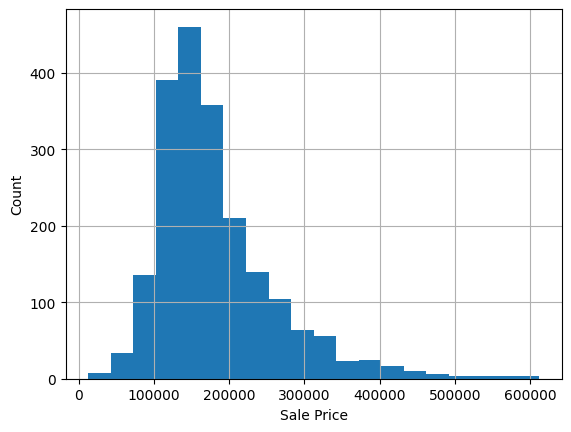

In [ ]:
import matplotlib.pyplot as plt

# create a histogram of the SalePrice column
df['SalePrice'].hist(bins=20)

# add x-axis and y-axis labels
plt.xlabel('Sale Price')
plt.ylabel('Count')

# display the plot
plt.show()


In [ ]:
from scipy.stats import zscore

# calculate z-scores for the 'SalePrice' column
df['SalePrice_zscore'] = zscore(df['SalePrice'])

# filter the rows where the z-score is greater than 3 or less than -3
outliers = df[(df['SalePrice_zscore'] > 3) | (df['SalePrice_zscore'] < -3)]

# print the outliers
print(outliers)



### Location Matters, sales prices are correlated with negative and positve home features. The homes with the lowest average sales price are near a lot of traffic and negative features like railroads.
#### Condition 1  
- Artery: In close proximity to a lot of traffic.
- Feedr: In close proximity to a feeder street.
- Norm: In a normal location.
- RRNn: Near a railroad.
- RRAn: Near a railroad and near a positive feature that increases home value.
- PosN:  In a positive neighborhood
- PosA: In a positive neighborhood and is close to a positive feature.
- RRNe: Near a railroad and near a negative feature.
- RRAe: Near a railroad and a near negative feature and/or easement.

#### Condition 2
- Artery: In close proximity to a lot of traffic.
- Feedr: In close proximity to a feeder street.
- Norm: In a normal location.
- RRNn: Near a railroad and a north-south road
- RRAn: Near a railroad and a east-west road
- PosN: Close to positive off-site feature like a park 
- PosA: Close to a positive off-site feature like (adjacent to property)
- RRNe: Close to railroad and north-south road and perhaps a parallel railroad
- RRAe: Close to railroad and near east-west road and perhaps a parallel railroad

In [ ]:
#view mean sales price based on Condition 1
df.groupby('Condition 1')['SalePrice'].mean().sort_values(ascending=False)



Condition 1
PosN      254794.296296
PosA      254733.333333
RRNn      198208.333333
Norm      185007.310130
RRAn      172604.777778
Feedr     143223.605505
RRAe      139685.714286
RRNe      129616.666667
Artery    128765.000000
Name: SalePrice, dtype: float64

In [ ]:
#view mean sales price based on Condition 2
df.groupby('Condition 2')['SalePrice'].mean().sort_values(ascending=False)

Condition 2
PosN      395666.666667
PosA      390666.666667
RRAe      190000.000000
Norm      181382.075556
RRAn      136905.000000
Feedr     129181.818182
Artery    119050.000000
RRNn       96750.000000
Name: SalePrice, dtype: float64

### Lowest sales prices are for homes that are close to busy streets and railroads. 

In [ ]:
# Average SalesPrice Based on Condition 1 and 2
df.groupby(['Condition 1', 'Condition 2'])['SalePrice'].mean().sort_values(ascending=False)


Condition 1  Condition 2
PosA         PosA           423500.000000
PosN         PosN           395666.666667
Artery       PosA           325000.000000
PosN         Norm           237185.250000
RRNn         Norm           233250.000000
PosA         Norm           220980.000000
Feedr        RRAe           190000.000000
RRAn         Norm           186158.222222
Norm         Norm           185007.310130
Feedr        Artery         146000.000000
             Norm           144426.156863
RRAe         Norm           139685.714286
Feedr        RRAn           136905.000000
RRAn         Feedr          134937.500000
RRNe         Norm           129616.666667
RRNn         Artery         128250.000000
             Feedr          128000.000000
Artery       Norm           126500.746269
RRAn         Artery         108000.000000
Feedr        Feedr          106750.000000
Artery       Artery         106500.000000
Feedr        RRNn            96750.000000
Name: SalePrice, dtype: float64

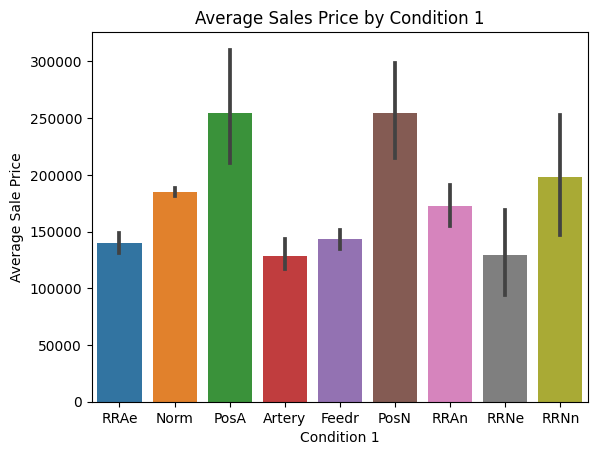

In [ ]:
# Error bars indicate the uncertainty in the data. It makes sense that the homes with negative features yet higher than average sales prices have the most uncertainty. 

import seaborn as sns

# create a bar plot using seaborn
sns.barplot(x='Condition 1', y='SalePrice', data=df)

# set plot title and axis labels
plt.title('Average Sales Price by Condition 1')
plt.xlabel('Condition 1')
plt.ylabel('Average Sale Price')

# display the plot
plt.show()


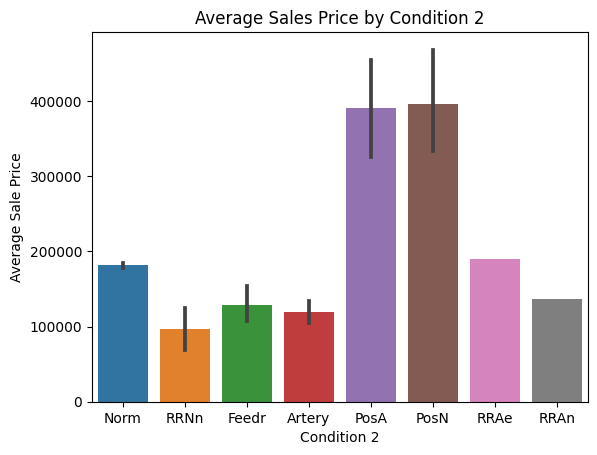

In [ ]:
# Error bars indicate the uncertainty in the data. 

import seaborn as sns

# create a bar plot using seaborn
sns.barplot(x='Condition 2', y='SalePrice', data=df)

# set plot title and axis labels
plt.title('Average Sales Price by Condition 2')
plt.xlabel('Condition 2')
plt.ylabel('Average Sale Price')

# display the plot
plt.show()


### Overall Quality of homes is centered around 4 to 6 and has a somewhat normal distribution. The highest quality homes make up a small portion of the data set. Three bedroom homes are a luxury and would drive prices higher. First floor square footage centers around 1,100 square feet. As square footage increases, the number of homes decrease. Total basement square footage matches the squre footage of the first floor which is not surprising. The number of bedrooms centers around 3 with homes greater than 3 bedrooms decreasing. According to the 2020 Census Bureau, the median income in Ames, Iowa is $54,339 with a poverty rate of about 26%. Most residents would not be able to afford homes that have more than 3 bedrooms and living space square footage greater than 1500 square feet. 

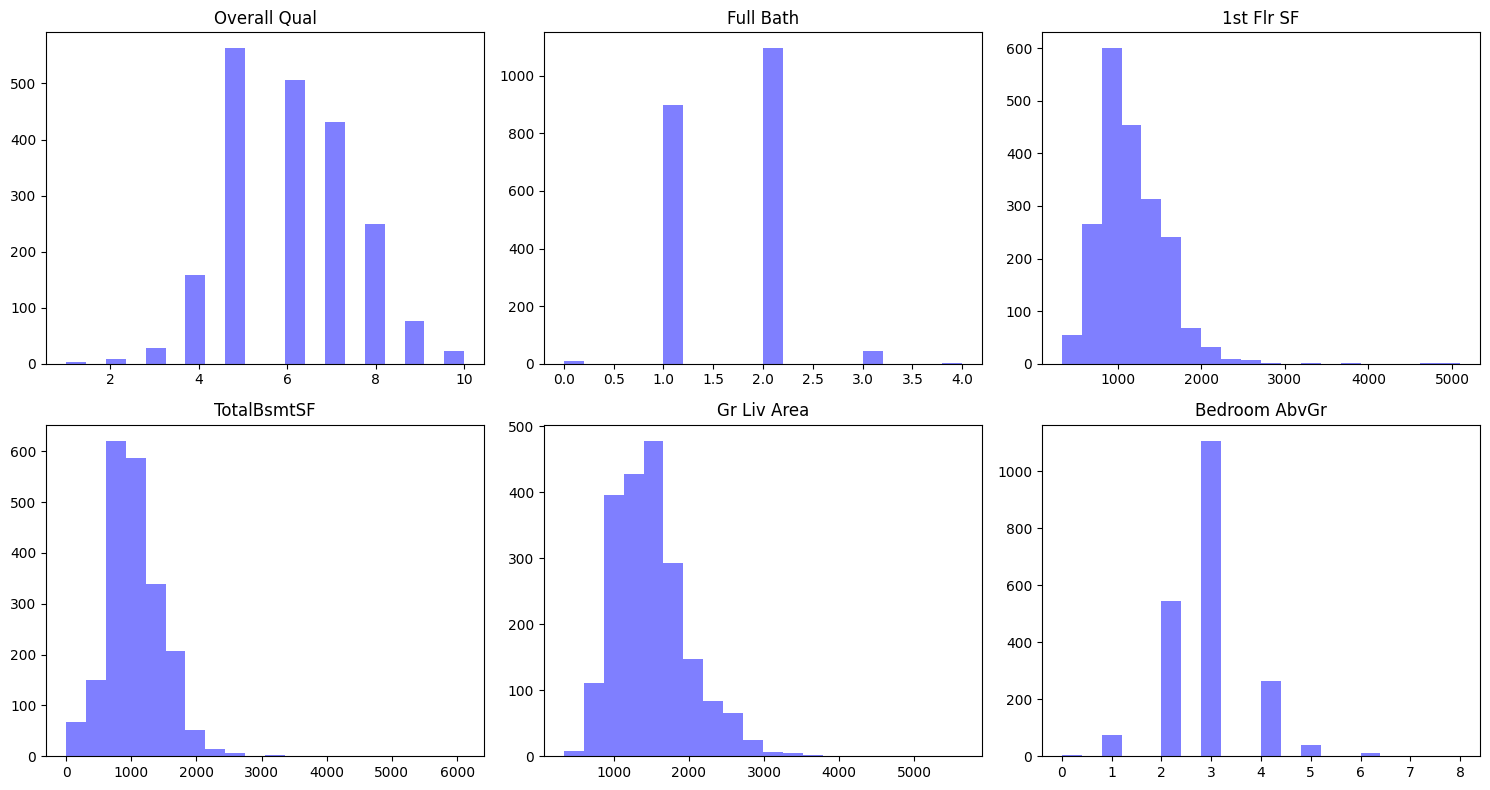

In [ ]:

# create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# set titles for each subplot
titles = ['Overall Qual', 'Full Bath', '1st Flr SF', 'TotalBsmtSF', 'Gr Liv Area', 'Bedroom AbvGr']

# loop through each feature and plot histogram
for i, feat in enumerate(['Overall Qual', 'Full Bath', '1st Flr SF', 'Total Bsmt SF', 'Gr Liv Area', 'Bedroom AbvGr']):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.hist(df[feat].dropna(), bins=20, alpha=0.5, color='b')
    ax.set_title(titles[i])

# adjust spacing between subplots
plt.tight_layout()

# display plot
plt.show()


In [ ]:
df.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish',

### Features that have the strongest correlations with sale price are Living Area, First floor square footage, the overall quality of the home. These numbers aren't too surprising. According to Census data, there are 2.21 person per househould so a need for more than homes with more than 3 bedrooms is not substantial. The histogram of the number of bedrooms align with this observation. The number of bedrooms wouldn't be a major factor. Most homes in Ames are 3 bedrooms. Since most homeowners spend more time in common areas like living rooms, I can understand why square footage of the living area and first floor square footage correlate with sales prices. Overall quality of the home is important for sales prices for economic reasons.Considering the median income, most homeowners would not have extra money for renovations. A move in ready home that is solidly built would command a higher price. 
Census Data: (https://www.census.gov/quickfacts/fact/table/amescityiowa/INC110221)

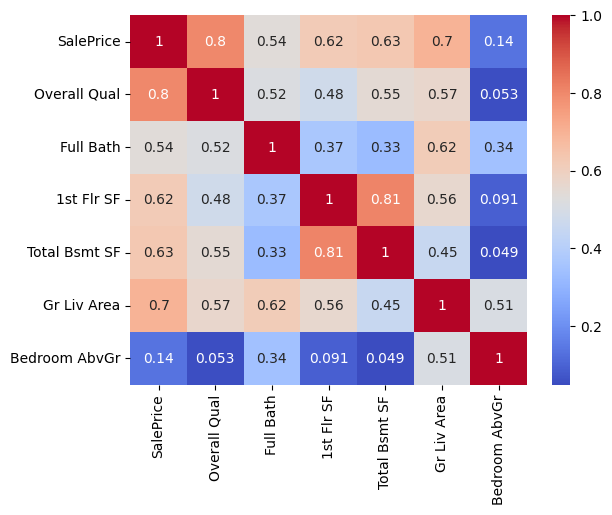

In [ ]:



# create a correlation matrix
corr_matrix = df[['SalePrice', 'Overall Qual', 'Full Bath', '1st Flr SF', 'Total Bsmt SF', 'Gr Liv Area', 'Bedroom AbvGr']].corr()



# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# display the plot
plt.show()


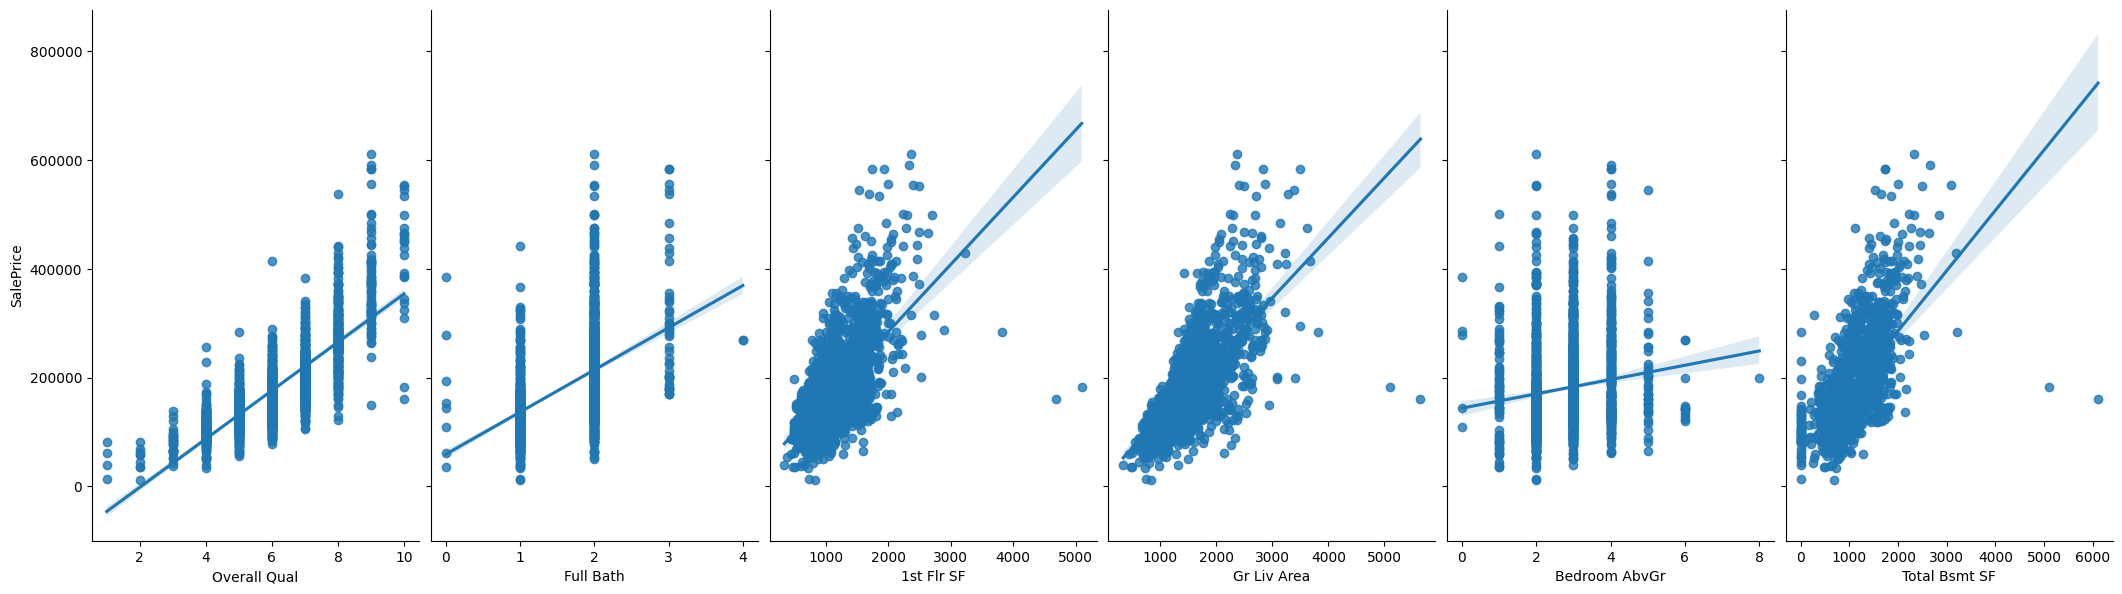

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(df, y_vars=['SalePrice'], 
             x_vars=['Overall Qual', 'Full Bath', '1st Flr SF', 'Gr Liv Area', 'Bedroom AbvGr', 'Total Bsmt SF'],
             height=6, aspect=.6, kind='reg')




In [ ]:
df.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,SalePrice_zscore
0,109,60,RL,69.0552,13517,Pave,NA,IR1,Lvl,AllPub,...,None,None,None,None,0,3,2010,WD,130500,-0.643237
1,544,60,RL,43.0000,11492,Pave,NA,IR1,Lvl,AllPub,...,None,None,None,None,0,4,2009,WD,220000,0.486252
2,153,20,RL,68.0000,7922,Pave,NA,Reg,Lvl,AllPub,...,None,None,None,None,0,1,2010,WD,109000,-0.914567
3,318,60,RL,73.0000,9802,Pave,NA,Reg,Lvl,AllPub,...,None,None,None,None,0,4,2010,WD,174000,-0.094268
4,255,50,RL,82.0000,14235,Pave,NA,IR1,Lvl,AllPub,...,None,None,None,None,0,3,2010,WD,138500,-0.542277


In [ ]:
# Download cleaned Data
df.to_csv('cleaned_data.csv', index=False)


### The main features for a model to predict home prices should include conditons 1, conditions 2, 1st Flr SF,Gr Liv Area, and Overall Quality. 

#### Generate your regression model using the training data. We expect that within this process, you'll be making use of:
- train-test split
- cross-validation / grid searching for hyperparameters
- strong exploratory data analysis to question correlation and relationship  across predictive variables
- code that reproducibly and consistently applies feature transformation (such as the preprocessing library)

### Although Conditon 1 and Conditon 2 both influence sale price. The features are collinear so only Condition 1 was used to create dummy variables. 

In [ ]:
# Create a new data frame with features to model

new_df = df.loc[:, ['Overall Qual', 'Full Bath', '1st Flr SF', 'Gr Liv Area', 'Condition 1', 'SalePrice']]
new_df.head()

,Overall Qual,Full Bath,1st Flr SF,Gr Liv Area,Condition 1,SalePrice
0,6,2,725,1479,RRAe,130500
1,7,2,913,2122,Norm,220000
2,5,1,1057,1057,Norm,109000
3,5,2,744,1444,Norm,174000
4,6,2,831,1445,Norm,138500


In [ ]:
# Check to make sure no null values are present
new_df.isnull().sum()

Overall Qual    0
Full Bath       0
1st Flr SF      0
Gr Liv Area     0
Condition 1     0
SalePrice       0
dtype: int64

In [ ]:
# Create dummy variables for condition 1

condition1_dummies = pd.get_dummies(new_df['Condition 1'], prefix='None', drop_first=True)

# Concatenate new_df with the dummy variables
new_df = pd.concat([new_df, condition1_dummies], axis=1)

# Drop the original condition 1 column
new_df = new_df.drop('Condition 1', axis=1)



In [ ]:
new_df.head()

,Overall Qual,Full Bath,1st Flr SF,Gr Liv Area,SalePrice,None_Feedr,None_Norm,None_PosA,None_PosN,None_RRAe,None_RRAn,None_RRNe,None_RRNn
0,6,2,725,1479,130500,0,0,0,0,1,0,0,0
1,7,2,913,2122,220000,0,1,0,0,0,0,0,0
2,5,1,1057,1057,109000,0,1,0,0,0,0,0,0
3,5,2,744,1444,174000,0,1,0,0,0,0,0,0
4,6,2,831,1445,138500,0,1,0,0,0,0,0,0


In [ ]:
# A check to see if features are all numerical
print(new_df.dtypes)


Overall Qual    int64
Full Bath       int64
1st Flr SF      int64
Gr Liv Area     int64
SalePrice       int64
None_Feedr      uint8
None_Norm       uint8
None_PosA       uint8
None_PosN       uint8
None_RRAe       uint8
None_RRAn       uint8
None_RRNe       uint8
None_RRNn       uint8
dtype: object


In [ ]:
y = new_df['SalePrice']
X = new_df.loc[:, new_df.columns != 'SalePrice']


In [ ]:
# Create a linear regression object
reg = LinearRegression()
reg


LinearRegression()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=123)


In [ ]:
#Fit LR
reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
reg.score(X_train,y_train)

0.7707330273035693

In [ ]:
# Use the trained model to predict the trip duration for the test data
y_pred = reg.predict(X_test)

In [ ]:
y_pred

In [ ]:
mean_y_pred = np.mean(y_pred)
print(mean_y_pred)

176334.95175098095


In [ ]:
mean_y_train = np.mean(y_train)
print(mean_y_train)

183557.01768292682


### Conclusions for MLR model: The model explains 77% of the variability in sales pricing. I believe the outliers determined by the z-score are a main factor in the model under performing and under estimating the sales prices on average. I assume there is multicollinearity between features in the regression. The graphs of 1st Floor Sq Feet vs Price and Ground Living Area indicate possible multicollinearity in the data. 

In [ ]:
test_data_clean = pd.read_csv('/content/drive/MyDrive/datasets/test_data.csv')

In [ ]:
test_data_clean.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,190,RM,69.000000,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,None,None,None,None,0,4,2006,WD
1,2718,90,RL,69.545961,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,0,None,None,None,None,0,8,2006,WD
2,2414,60,RL,58.000000,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,0,None,None,None,None,0,9,2006,New
3,1989,30,RM,60.000000,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,0,None,None,None,None,0,7,2007,WD
4,625,20,RL,69.545961,9500,Pave,NaN,IR1,Lvl,AllPub,...,0,185,None,None,None,None,0,7,2009,WD


In [ ]:

predictions = reg.predict(new_data)


predictions

In [ ]:
# scatterplot of predictions vs y

In [ ]:
new_data_2 = pd.read_csv('/content/drive/MyDrive/project-2-master/new_data_2.csv')

In [ ]:
new_data_2['Sale Price'] = predictions

In [ ]:
new_data_2.head()

,Id,Overall Qual,Full Bath,1st Flr SF,Gr Liv Area,None_Feedr,None_Norm,None_PosA,None_PosN,None_RRAe,None_RRAn,None_RRNe,None_RRNn,Sale Price
0,2658,6,2,908,1928,0,1,0,0,0,0,0,0,189107.910212
1,2718,5,2,1967,1967,0,1,0,0,0,0,0,0,206377.317284
2,2414,7,2,664,1496,0,1,0,0,0,0,0,0,187639.337567
3,1989,5,1,968,968,0,1,0,0,0,0,0,0,117567.910862
4,625,6,1,1394,1394,0,1,0,0,0,0,0,0,185547.762228


In [ ]:


# Assume new_data_2 is your DataFrame
submission_df = pd.DataFrame({'Id': new_data_2['Id'], 'Sale Price': new_data_2['Sale Price']})

# Save the submission file as a CSV
submission_df.to_csv('submission.csv', index=False)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
y = new_df['SalePrice']
X = new_df.loc[:, new_df.columns != 'SalePrice']


In [ ]:
#Instantiate 

# Create a PolynomialFeatures object with degree 2
poly = PolynomialFeatures(degree=2, interaction_only = False, include_bias = False)

# Fit and transform the input features X
X_poly = poly.fit_transform(X)

# X_poly will have polynomial features


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into train and test sets
Z_train, Z_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
Z_train = scaler.fit_transform(Z_train)
Z_test = scaler.transform(Z_test)


# Check the shapes of the train and test sets
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')


Z_train shape is: (1435, 90)
y_train shape is: (1435,)
Z_test shape is: (616, 90)
y_test shape is: (616,)


In [ ]:
import statsmodels.api as sm

# Add a constant column of 1's to the train set
Z_train = sm.add_constant(Z_train)

# Fit the OLS model using the train set
model = sm.OLS(y_train, Z_train).fit()

# Print the summary of the model
print(model.summary())





The calculated R-square measures the variance in Sales Price that can be explained by the selected features. An R-squared value of 0.848 suggests 84.8% of variation in Sale Price is explained by features in the model. 

Since multiple features are used in this model, the adjusted R-squared is a better measure of fitness of the model. The adjusted R-squared of 0.842 is is extremely close to the R-squared. 

The  p-value of 0.0 indicates that the null hypothesis can be rejected and the results are statistically significant. 





Before tuning the alpha, the Lasso R2 score was also 0.6618524303613462. This means that after tuning the regularization parameter, the Lasso model did not improve its performance.

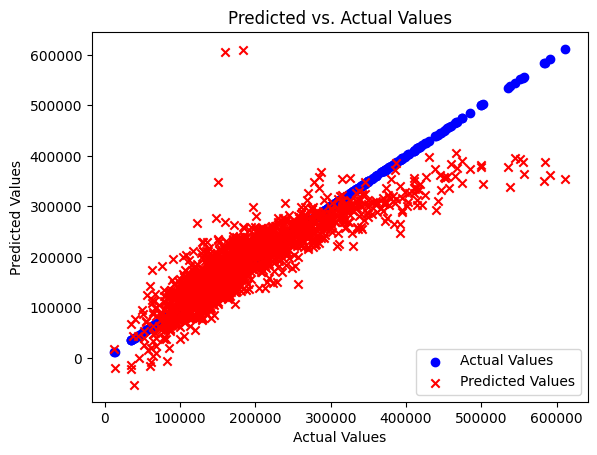

In [ ]:
# scatter plot of predicted vs. actual values
plt.scatter(y, y, color='blue', label='Actual Values')
plt.scatter(y, y_pred, color='red', marker='x', label='Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

